### Задача 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random as rd
import seaborn as sns
import matplotlib.ticker as ticker
import pandas as pd

plt.style.use('seaborn')
%matplotlib inline

In [2]:
import scipy.stats as sts
from scipy.stats import norm, expon, poisson, bernoulli
from tqdm import tqdm

a)

In [3]:
bus_count = []
timon_choice = []
pumba_choice = []
for i in tqdm(range(10**4)):
    summ = 0
    count = 0
    timon_list =  []
    pumba_time = np.random.choice(np.arange(1, 720))
    while summ < 720:
        # случайно генерируем время между автобусами, при этом a - количество людей в ближайшем автобусе
        a = np.random.binomial(1, p=0.5) * 5 + 5 # np.binomial гораздо быстрее работает, чем random.choice
        timon_list.append(a)
        summ += a
        if summ <= 720:
            count += 1
            if (summ - pumba_time) > 0 and (summ - pumba_time) <= a and (summ <= 720):
                pumba_choice.append(a) 
        # если Пумба пришел позже времени последнего автобуса, то это не учитывается в выборке
       
        
    bus_count.append(count)
    timon_choice.append(np.random.choice(timon_list))

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:11<00:00, 902.70it/s]


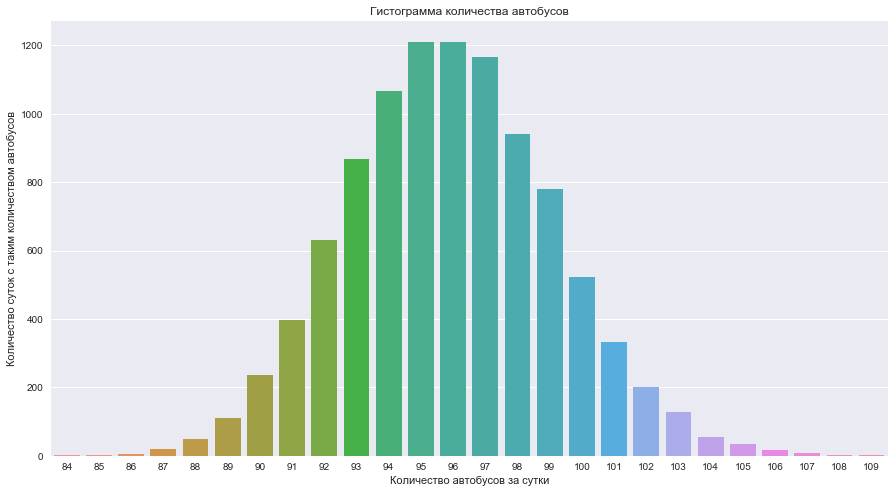

In [4]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(bus_count)
plt.xlabel('Количество автобусов за сутки')
plt.ylabel('Количество суток с таким количеством автобусов')
plt.title('Гистограмма количества автобусов')
plt.show() 

Да, визуально распределение очень похоже на нормальное

б)

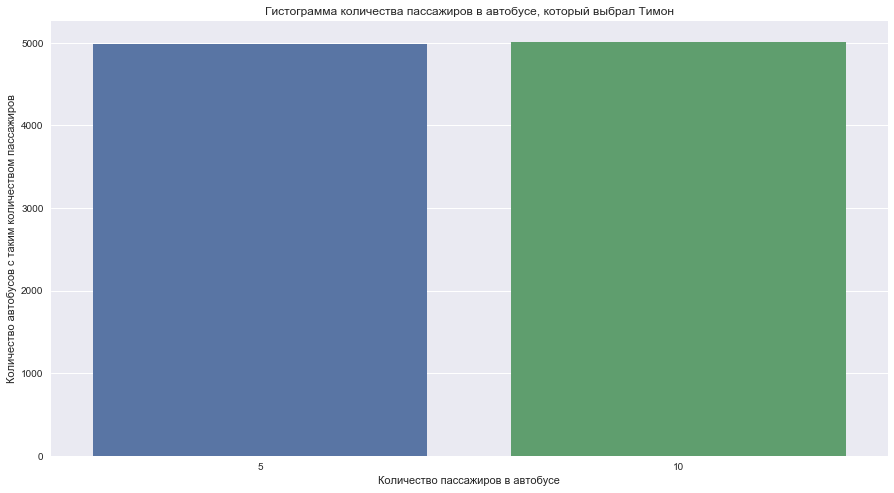

In [5]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(timon_choice)
plt.xlabel('Количество пассажиров в автобусе')
plt.ylabel('Количество автобусов с таким количеством пассажиров')
plt.title('Гистограмма количества пассажиров в автобусе, который выбрал Тимон')
plt.show() 

- Матожидание

Оценка вероятности, что Тимон поедет на автобусе с 5 пассажирами (p):

In [6]:
p = timon_choice.count(5) / len(timon_choice)
p

0.4986

Соответственно, вероятность, что Тимон поедет на автобусе с 10 пассажирами (1-p):

In [7]:
timon_choice.count(10) / len(timon_choice)

0.5014

Всего два значения, принимаемые с вероятностью p и (1-p), следовательно, это распределение Бернулли (с придавленной 5), и матожидание можно посчитать как:

In [8]:
E_X = p * 5 + (1-p) * 10 
E_X

7.5070000000000014

In [9]:
np.mean(timon_choice)

7.507

- Дисперсия:

In [10]:
E_X2 = p * 25 + (1-p) * 100 
Var_X = E_X2 - E_X ** 2
Var_X

6.249950999999982

In [11]:
np.var(timon_choice)

6.249951000000002

в)

При решении я не считаю Пумбу пассажиром

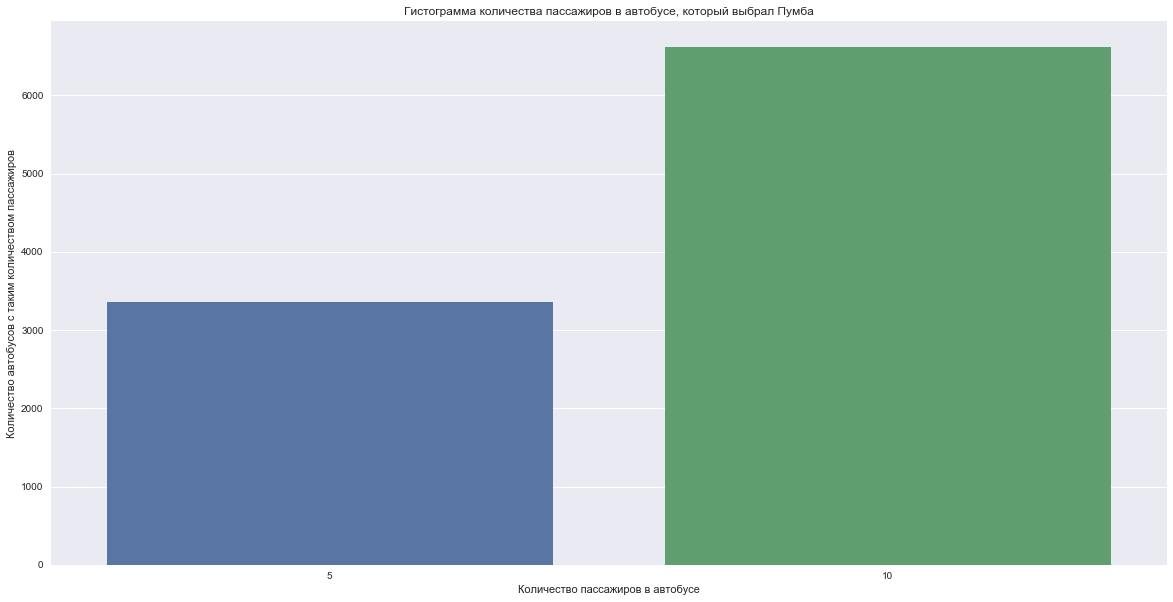

In [12]:
plt.figure(figsize=(20, 10))
ax = sns.countplot(pumba_choice)
plt.xlabel('Количество пассажиров в автобусе')
plt.ylabel('Количество автобусов с таким количеством пассажиров')
plt.title('Гистограмма количества пассажиров в автобусе, который выбрал Пумба')
plt.show() 

Аналогично Тимону посчитаем матожидание и дисперсию для Пумбы:

- Матожидание

In [13]:
p = pumba_choice.count(5) / len(pumba_choice)
p

0.33687374749499

In [14]:
E_X = p * 5 + (1-p) * 10 
E_X

8.31563126252505

In [15]:
np.mean(pumba_choice)

8.31563126252505

- Дисперсия

In [16]:
E_X2 = p * 25 + (1-p) * 100 
Var_X = E_X2 - E_X ** 2
Var_X

5.584745643591788

In [17]:
np.var(pumba_choice) 

5.584745643591794

г)

In [18]:
bus_count_2 = []
timon_choice = []
pumba_choice = []
for i in tqdm(range(10**4)):
    summ = 0
    count = 0
    timon_list = []
    pumba_time = np.random.choice(np.arange(1, 720))
    while summ < 720:
        # случайно генерируем время между автобусами, при этом a - количество людей в ближайшем автобусе
        a = rd.expovariate(0.1)
        timon_list.append(int(a)) # int(a), так как количество людей в автобусе целое
        summ += a
        if summ <= 720:
            count += 1
            if (summ - pumba_time) > 0 and ((summ - pumba_time) <= a) and (summ <= 720):
                pumba_choice.append(int(a))
       
        
    bus_count_2.append(count)
    timon_choice.append(np.random.choice(timon_list))

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:10<00:00, 977.18it/s]


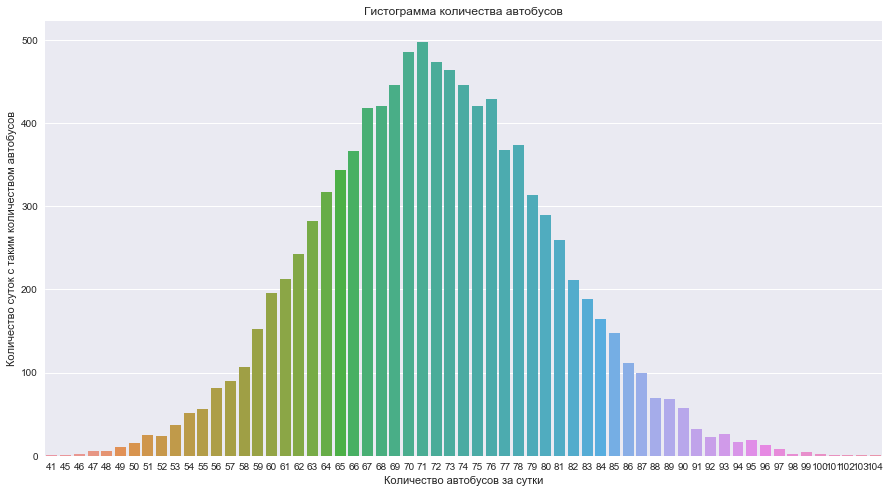

In [19]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(bus_count_2)
sns.set(style="darkgrid")
plt.xlabel('Количество автобусов за сутки')
plt.ylabel('Количество суток с таким количеством автобусов')
plt.title('Гистограмма количества автобусов')
plt.show() 

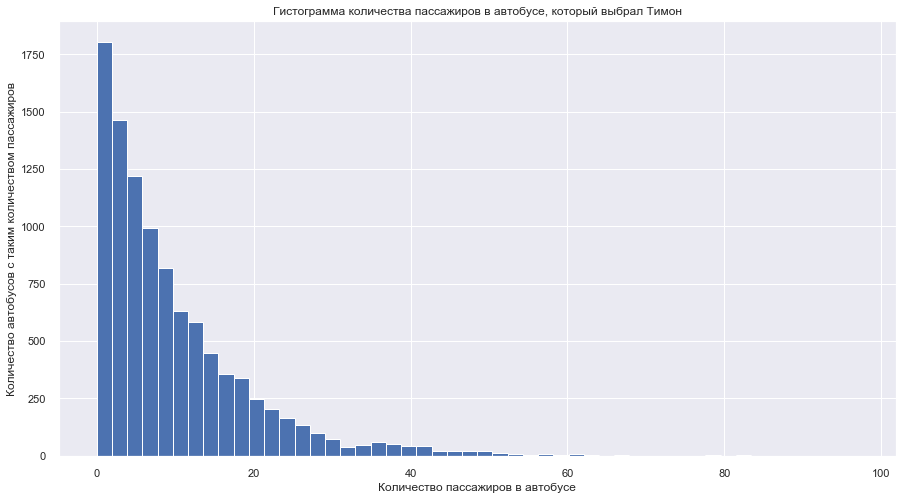

In [20]:
plt.figure(figsize=(15, 8))
ax = plt.hist(timon_choice, bins=50)
sns.set(style="darkgrid")
plt.xlabel('Количество пассажиров в автобусе')
plt.ylabel('Количество автобусов с таким количеством пассажиров')
plt.title('Гистограмма количества пассажиров в автобусе, который выбрал Тимон')
plt.show()

In [26]:
np.mean(timon_choice) 

9.5556

In [27]:
np.var(timon_choice)

100.92650864

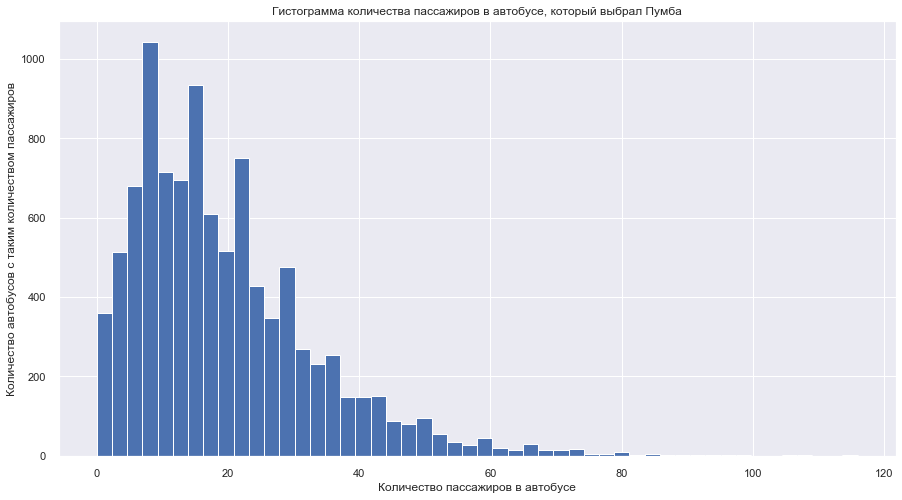

In [23]:
plt.figure(figsize=(15, 8))
ax = plt.hist(pumba_choice, bins=50)
sns.set(style="darkgrid")
plt.xlabel('Количество пассажиров в автобусе')
plt.ylabel('Количество автобусов с таким количеством пассажиров')
plt.title('Гистограмма количества пассажиров в автобусе, который выбрал Пумба')
plt.show() 

In [28]:
np.mean(pumba_choice)

19.461733658140478

In [29]:
np.var(pumba_choice)

198.11130466799827

### Задача 2

a)

In [30]:
n_games=1000

In [31]:
def casino_a():
    profit_a = np.random.choice((1, -1), p=(0.49, 0.51), size=n_games)
    profit_A = np.append(np.array([0]), profit_a)
    cumincome = np.cumsum(profit_A) + np.ones(n_games+1) * 1000
        
    return cumincome

In [32]:
atos_games = np.zeros((10**4, n_games+1))
for i in tqdm(range(10**4)):
    atos_games[i] = casino_a()

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:02<00:00, 4475.80it/s]


In [33]:
atos_mean = np.mean(atos_games, axis=0)

In [34]:
# выбираем 10 случайных итераций (индексы посещений казино)
ten_atos_games = np.random.choice(np.arange(10**4), size=10)

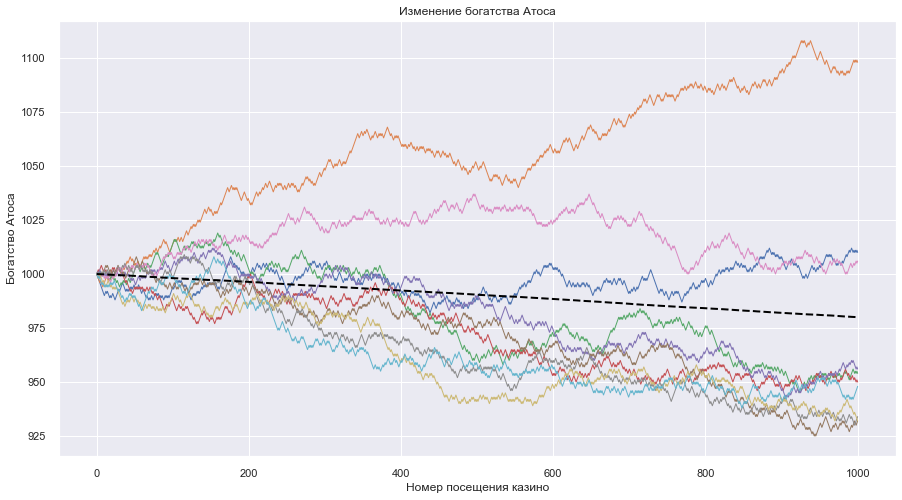

In [35]:
plt.figure(figsize=(15,8))
for game in atos_games[ten_atos_games]:
    plt.plot(game, linewidth=1.0)
    plt.xlabel('Номер посещения казино')
    plt.ylabel('Богатство Атоса')
    plt.title('Изменение богатства Атоса')
plt.plot(atos_mean, color='black', linestyle='dashed', linewidth=2)

б)

In [36]:
# выигрыш в казино Б
def profit_b(m):
    if m % 3 == 0:
        pr_b = np.random.binomial(1, p=0.09) * 2 - 1
    else:
        pr_b = np.random.binomial(1, p=0.74) * 2 - 1
        
    return pr_b

In [37]:
def casino_b():
    games = np.zeros(n_games+1)
    m = 1000
    games[0] = m
    for i in range(1,n_games+1):
        m += profit_b(m)
        games[i] = m
    return games

In [38]:
partos_games = np.zeros((10**4, n_games+1))
for i in tqdm(range(10**4)):
      partos_games[i] = casino_b()

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [01:20<00:00, 123.64it/s]


In [39]:
ten_partos_games = np.random.choice(np.arange(10**4), size=10)

In [40]:
partos_mean = np.mean(partos_games, axis=0)

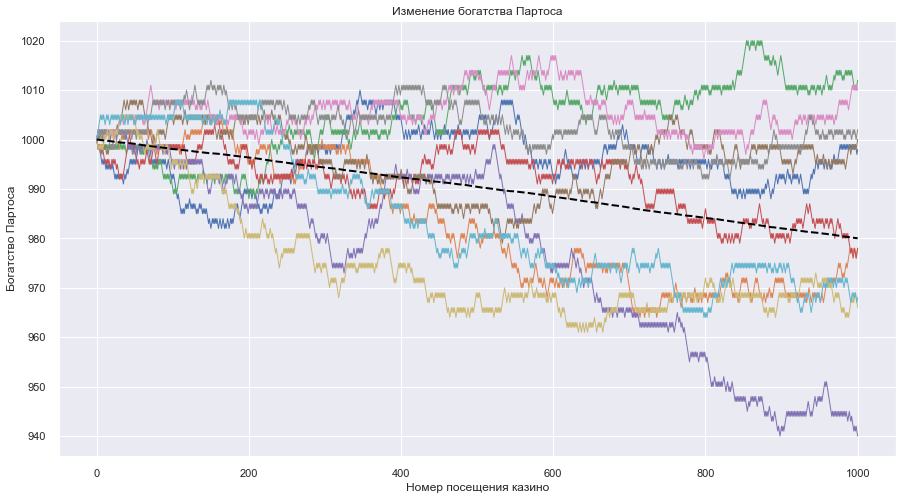

In [41]:
plt.figure(figsize=(15,8))
for game in partos_games[ten_partos_games]:
    plt.plot(game, linewidth=1.0)
    plt.xlabel('Номер посещения казино')
    plt.ylabel('Богатство Партоса')
    plt.title('Изменение богатства Партоса')
plt.plot(atos_mean, color='black', linestyle='dashed', linewidth=2)

в)

In [42]:
aramis_games = np.zeros((10**4, n_games+1))
for i in tqdm(range(10**4)):
    m = 1000
    aramis_games[i][0] = m
    for j in range(1, n_games+1):
        casino = np.random.binomial(1, p=0.5)
        if casino == 1:
            m += (np.random.binomial(1, p=0.49) * 2 - 1)
            aramis_games[i][j] = m
        else:
            m += profit_b(m)
            aramis_games[i][j] = m

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:40<00:00, 62.24it/s]


In [43]:
ten_aramis_games = np.random.choice(np.arange(10**4), size=10)

In [44]:
aramis_mean = np.mean(aramis_games, axis=0)

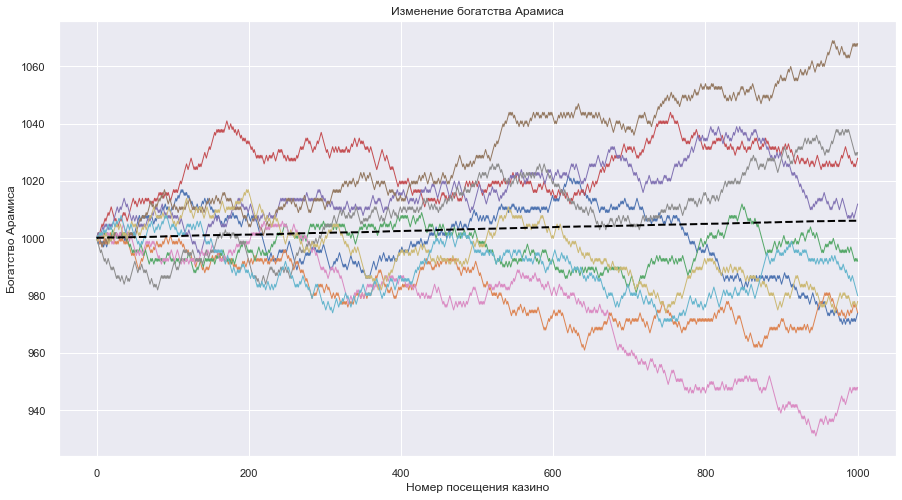

In [45]:
plt.figure(figsize=(15,8))
for game in aramis_games[ten_aramis_games]:
    plt.plot(game, linewidth=1.0)
    plt.xlabel('Номер посещения казино')
    plt.ylabel('Богатство Арамиса')
    plt.title('Изменение богатства Арамиса')
plt.plot(aramis_mean, color='black', linestyle='dashed', linewidth=2)

### Задача 3

а)

In [46]:
passed_num = [len([s[0] for s in enumerate([rd.normalvariate(mu=60, sigma=10)+rd.normalvariate(mu=60, sigma=10)
                               for i in range(10**4)]) if s[1] > n]) for n in range(80, 161, 5) ]

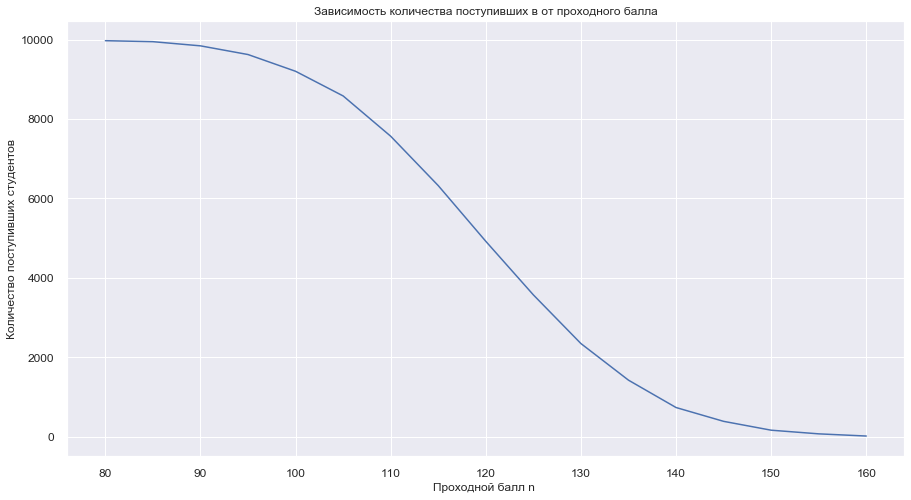

In [47]:
fig = plt.figure(figsize=(15,8))
plt.plot(np.arange(80, 161, 5), passed_num)

plt.title('Зависимость количества поступивших в от проходного балла')
plt.ylabel('Количество поступивших студентов')
plt.xlabel('Проходной балл n ')
plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()

б)

In [48]:
corr_passed = []
corr_not_passed = []
math_score = np.array([rd.normalvariate(mu=60, sigma=10) for i in range(10**4)])
rus_score = np.array([rd.normalvariate(mu=60, sigma=10) for i in range(10**4)])
total_score = math_score + rus_score
for n in tqdm(range(80, 161, 5)):
    students_ind = [s[0] for s in enumerate(total_score) if s[1] > n]
    not_students_ind = [s[0] for s in enumerate(total_score) if s[1] <= n]
    
    korr1 = np.corrcoef(math_score[students_ind], rus_score[students_ind])
    korr0 = np.corrcoef(math_score[not_students_ind], rus_score[not_students_ind])
    
    corr_passed.append(korr1[0, 1])
    corr_not_passed.append(korr0[0, 1])

100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 48.26it/s]


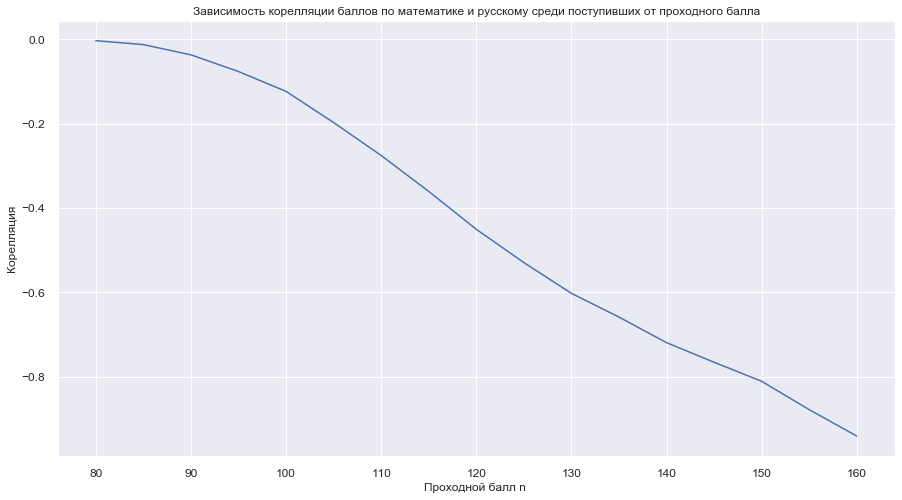

In [49]:
fig = plt.figure(figsize=(15,8))
plt.plot(np.arange(80, 161, 5), corr_passed)

plt.title('Зависимость корелляции баллов по математике и русскому среди поступивших от проходного балла')
plt.ylabel('Корелляция')
plt.xlabel('Проходной балл n ')
plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()

в)

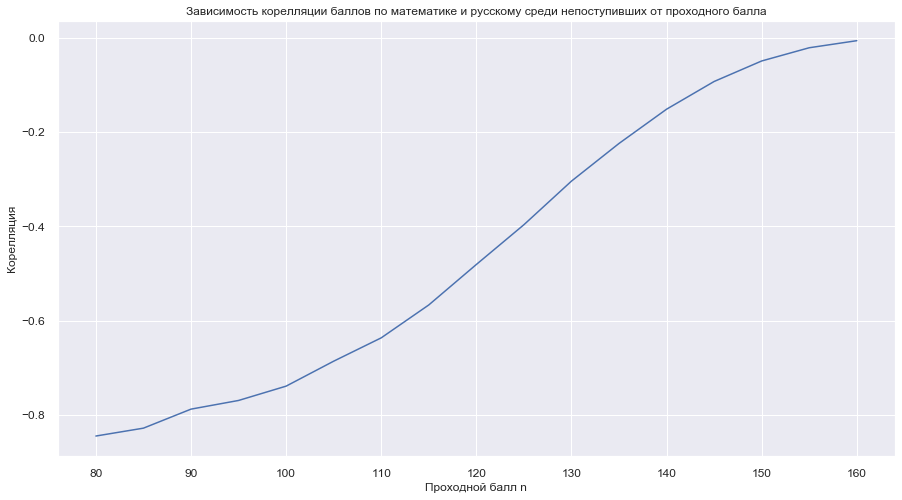

In [50]:
fig = plt.figure(figsize=(15,8))
plt.plot(np.arange(80, 161, 5), corr_not_passed)

plt.title('Зависимость корелляции баллов по математике и русскому среди непоступивших от проходного балла')
plt.ylabel('Корелляция')
plt.xlabel('Проходной балл n')
plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()

### Задача 4

a)

In [51]:
from scipy.optimize import minimize

In [52]:
# аналог функции правдоподобия, для упрощения я не выписываю лишние константы, которые никак не повлияют на результат
def minus_lklh(mu, rez):
    lklh =  - np.sum((rez - mu) ** 2)
    return -lklh

In [53]:
mu_init = 10
data = pd.DataFrame()
for i in tqdm(range(10 ** 4)):
    X = norm.rvs(size=100, loc=60, scale=10)
    Y = norm.rvs(size=100, loc=70, scale=10)
    Z = norm.rvs(size=100, loc=80, scale=10)
    
    # ОМП матожиданий
    mu_x = minimize(minus_lklh, mu_init, args=X).x
    mu_y = minimize(minus_lklh, mu_init, args=Y).x
    mu_z = minimize(minus_lklh, mu_init, args=Z).x
    
    data = pd.concat([data, pd.DataFrame([mu_x, mu_y, mu_z]).T])

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [01:27<00:00, 114.90it/s]


In [54]:
data = data.rename(columns={0: "Nif_wolf", 1: "Naf_wolf", 2: "Nuf_wolf"})

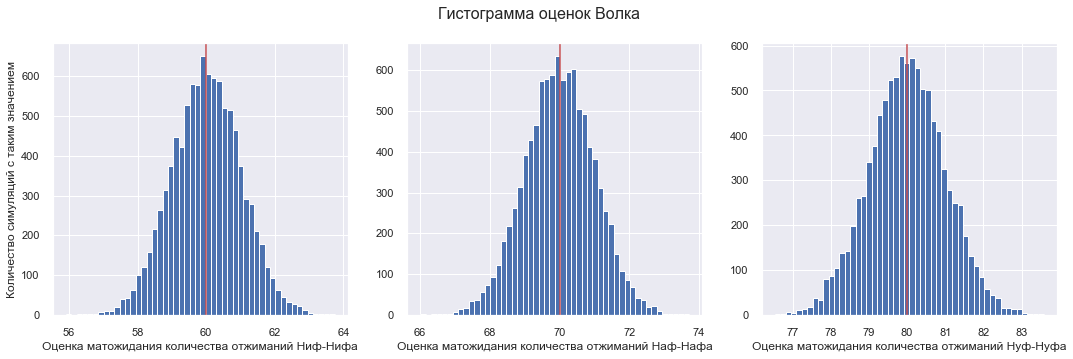

In [55]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

ax[0].hist(data['Nif_wolf'], bins=50)
ax[0].set_ylabel('Количество симуляций с таким значением')
ax[0].set_xlabel('Оценка матожидания количества отжиманий Ниф-Нифа')
ax[0].axvline(60, color='r')

ax[1].hist(data['Naf_wolf'], bins=50)
# ax[1].set_ylabel('Количество симуляций с таким значением')
ax[1].set_xlabel('Оценка матожидания количества отжиманий Наф-Нафа')
ax[1].axvline(70, color='r')

ax[2].hist(data['Nuf_wolf'], bins=50)
# ax[2].set_ylabel('Количество симуляций с таким значением')
ax[2].set_xlabel('Оценка матожидания количества отжиманий Нуф-Нуфа')
ax[2].axvline(80, color='r')

plt.suptitle('Гистограмма оценок Волка', fontsize=16)

plt.show()

# красная линия - истинное матожидание

б)

In [56]:
data['S_wolf'] = (data['Nif_wolf'] - 60) ** 2 + (data['Naf_wolf'] - 70) ** 2 + (data['Nuf_wolf'] - 80) ** 2

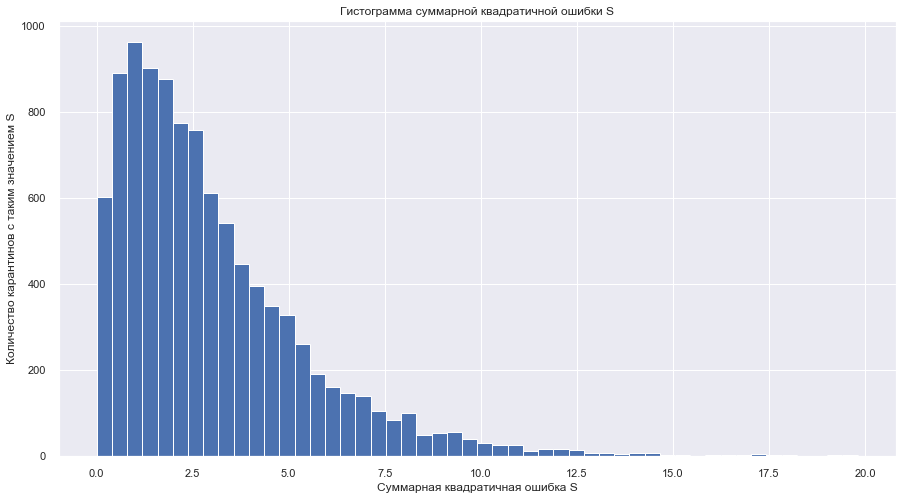

In [57]:
plt.figure(figsize=(15, 8))
ax = plt.hist(data['S_wolf'], bins=50)
sns.set(style="darkgrid")
plt.xlabel('Суммарная квадратичная ошибка S')
plt.ylabel('Количество карантинов с таким значением S')
plt.title('Гистограмма суммарной квадратичной ошибки S')
plt.show() 

в)

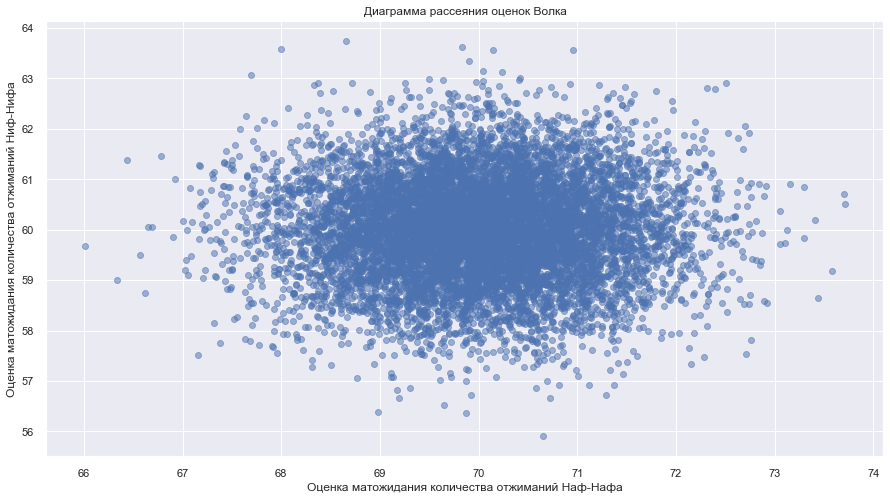

In [58]:
plt.figure(figsize=(15, 8))
plt.scatter(data['Naf_wolf'], data['Nif_wolf'], alpha=0.5)
plt.xlabel('Оценка матожидания количества отжиманий Наф-Нафа')
plt.ylabel('Оценка матожидания количества отжиманий Ниф-Нифа')
plt.title('Диаграмма рассеяния оценок Волка')

plt.show()

In [59]:
corr_wolf = np.corrcoef(data['Naf_wolf'], data['Nif_wolf'])[0, 1]
print("Выборочная корреляция оценок Волка: ", '{:.4f}'.format(corr_wolf))

Выборочная корреляция оценок Волка:  0.0096


г)

In [60]:
data['fox_coef'] = 1 - 1 / (data['Nif_wolf'] ** 2 + data['Naf_wolf'] ** 2 + data['Nuf_wolf'] ** 2)

In [61]:
data['Nif_fox'] = data['Nif_wolf'] * data['fox_coef']
data['Naf_fox'] = data['Naf_wolf'] * data['fox_coef']
data['Nuf_fox'] = data['Nuf_wolf'] * data['fox_coef']

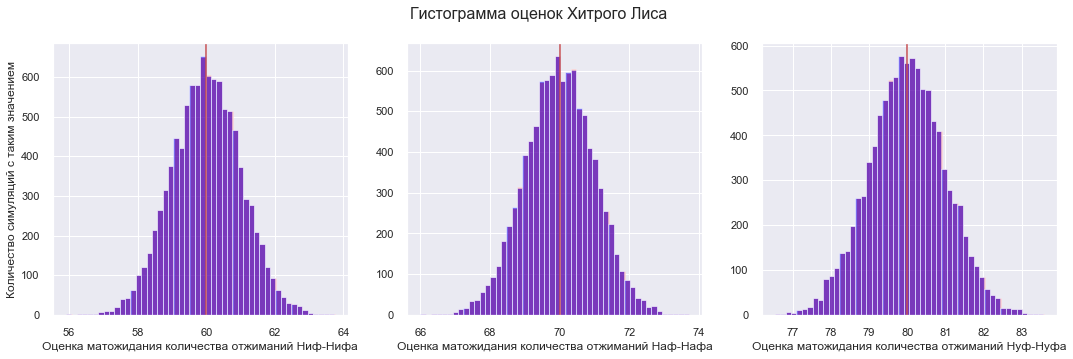

In [62]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

ax[0].hist(data['Nif_wolf'], color='red', bins=50, alpha=0.5)
ax[0].hist(data['Nif_fox'], color='blue', bins=50, alpha=0.5)
ax[0].set_ylabel('Количество симуляций с таким значением')
ax[0].set_xlabel('Оценка матожидания количества отжиманий Ниф-Нифа')
ax[0].axvline(60, color='r')

ax[1].hist(data['Naf_wolf'], color='red', bins=50, alpha=0.5)
ax[1].hist(data['Naf_fox'], color='blue', bins=50, alpha=0.5)
# ax[1].set_ylabel('Количество симуляций с таким значением')
ax[1].set_xlabel('Оценка матожидания количества отжиманий Наф-Нафа')
ax[1].axvline(70, color='r')

ax[2].hist(data['Nuf_wolf'], color='red', bins=50, alpha=0.5)
ax[2].hist(data['Nuf_fox'], color='blue', bins=50, alpha=0.5)
# ax[2].set_ylabel('Количество симуляций с таким значением')
ax[2].set_xlabel('Оценка матожидания количества отжиманий Нуф-Нуфа')
ax[2].axvline(80, color='r')

plt.suptitle('Гистограмма оценок Хитрого Лиса', fontsize=16)

plt.show()

# красная линия - истинное матожидание

In [63]:
data['S_fox'] = (data['Nif_fox'] - 60) ** 2 + (data['Naf_fox'] - 70) ** 2 + (data['Nuf_fox'] - 80) ** 2

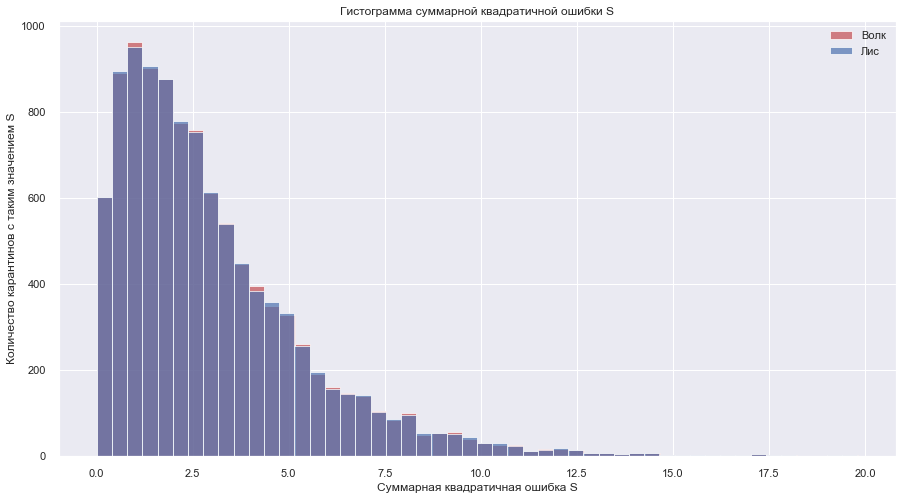

In [64]:
plt.figure(figsize=(15, 8))
ax = plt.hist(data['S_wolf'], color='r', bins=50, alpha=0.7, label="Волк")
ax = plt.hist(data['S_fox'], color='b', bins=50, alpha=0.7, label="Лис")

sns.set(style="darkgrid")
plt.xlabel('Суммарная квадратичная ошибка S')
plt.ylabel('Количество карантинов с таким значением S')
plt.title('Гистограмма суммарной квадратичной ошибки S')
plt.legend()
plt.show() 

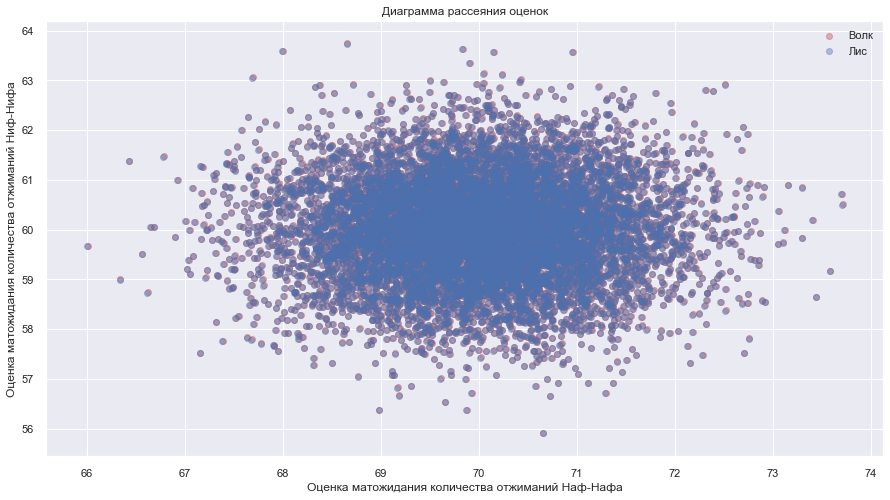

In [65]:
plt.figure(figsize=(15, 8))
plt.scatter(data['Naf_wolf'], data['Nif_wolf'],color='r', alpha=0.4, label='Волк')
plt.scatter(data['Naf_fox'], data['Nif_fox'], color='b', alpha=0.4, label='Лис')

plt.xlabel('Оценка матожидания количества отжиманий Наф-Нафа')
plt.ylabel('Оценка матожидания количества отжиманий Ниф-Нифа')
plt.title('Диаграмма рассеяния оценок')
plt.legend()

plt.show()

На графиках я изобразила данные и для Лиса, и для Волка. Как видно, данные несильно отличаются, практически накладываются, по графикам сложно оценить эффективность оценок

In [66]:
corr_fox = np.corrcoef(data['Naf_fox'], data['Nif_fox'])[0, 1]
print("Выборочная корреляция оценок Хитрого Лиса: ", '{:.4f}'.format(corr_fox))

Выборочная корреляция оценок Хитрого Лиса:  0.0097


д)

Сравним квадраты ошибок оценки количества отжиманий Ниф-Нифа:

In [67]:
np.sum((data['Nif_wolf']-60)**2) 

10096.298603197843

In [68]:
np.sum((data['Nif_fox']-60)**2) 

10096.019615873567

У Лиса незначительно меньше

Сравним квадарты суммарных ошибок:

In [69]:
np.sum(data['S_wolf'])

29904.99360421561

In [70]:
np.sum(data['S_fox'])

29904.783789202585

Суммарная сумма ошибок Лиса снова меньше. Таким образом, несмотря на то, что графики очень похожи, Хитрый Лис всё же точнее оценивает накачанность трех поросят (в частности Ниф-Нифа). Если бы матожидания были меньше, эффект был бы заметнее (коэффициент лиса был бы меньше).